# Introduction
Very often we want to get an application but we do not know if it is worth to pay for one. I wanted to do a research about how price is impacted by its quality and is it really always worth to buy it?
<br> We know that quality can have a lot of meaning, however, in my case I wanted to present it on 3 the most popular factors: Rating, Installs and Reviews. I used data from kaggle: https://www.kaggle.com/datasets/lava18/google-play-store-apps.

In [1]:
# Importing important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import curve_fit

In [2]:
# Importing dataset
df = pd.read_csv('googleplaystore.csv')

In [3]:
# Brief overview of data
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
# Checking the type of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [5]:
# Changing style of entries in chosen columns (deleting special characters)
for a,b in enumerate(df['Installs']):
    c = b.replace(',','')
    df.loc[a,'Installs']=  c.replace('+','')

for a,b in enumerate(df['Price']):
    df.loc[a,'Price'] = b.replace('$','')

df['Installs'] = pd.to_numeric(df['Installs'], errors='coerce')
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')
df['Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce')


# Dirty Data
We know that data, which we always download, is not perfect. That is why we need to first take a look at it and understand with what are we going to deal, in my case I rather wanted to find outliners which could negatively impact my ML model.

Text(0, 0.5, 'Price')

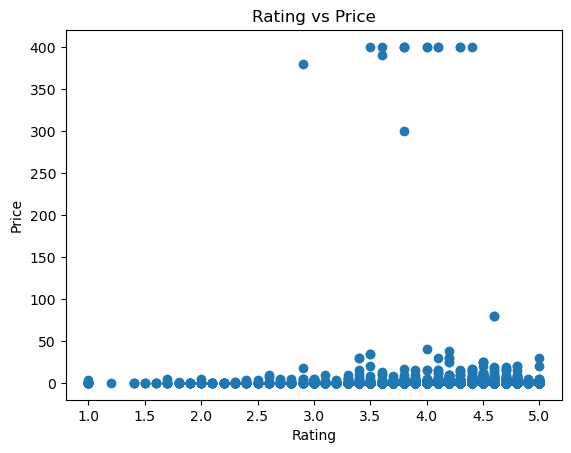

In [6]:
# Brief plotting of raw data
plt.scatter(df['Rating'], df['Price'])
plt.title('Rating vs Price')
plt.xlabel('Rating')
plt.ylabel('Price')

Text(0.5, 0.92, 'Rating vs Installs vs Reviews')

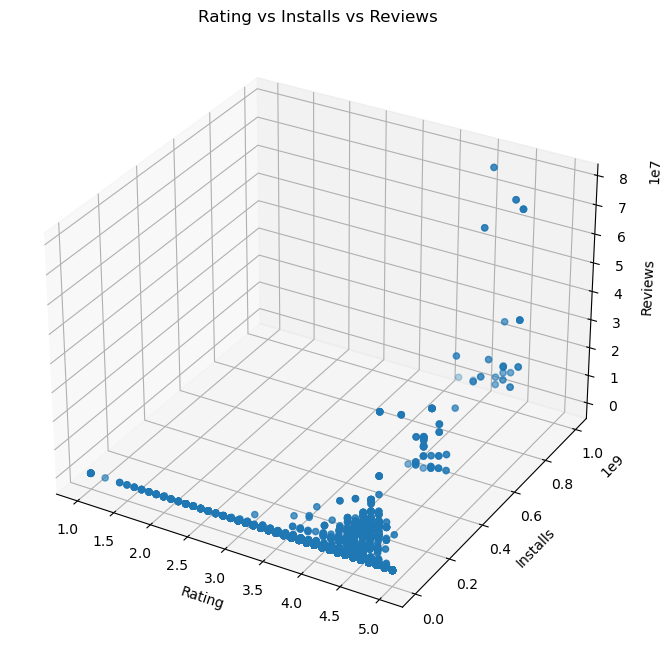

In [7]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection="3d")

ax.scatter3D(df['Rating'],df['Installs'], df['Reviews'], 'gray')

ax.set_xlabel("Rating")
ax.set_ylabel("Installs")
ax.set_zlabel("Reviews")
ax.set_title('Rating vs Installs vs Reviews')

In [8]:
# Analyzing application of price more than 50$
df[df['Price']>50]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2253,Vargo Anesthesia Mega App,MEDICAL,4.6,92.0,32M,1000.0,Paid,79.99,Everyone,Medical,"June 18, 2018",19.0,4.0.3 and up
2365,Vargo Anesthesia Mega App,MEDICAL,4.6,92.0,32M,1000.0,Paid,79.99,Everyone,Medical,"June 18, 2018",19.0,4.0.3 and up
2390,Language Therapy: Aphasia,MEDICAL,NaN,10.0,28M,1000.0,Paid,74.99,Everyone,Medical,"June 25, 2018",3.1.1,4.0.3 and up
4197,most expensive app (H),FAMILY,4.3,6.0,1.5M,100.0,Paid,399.99,Everyone,Entertainment,"July 16, 2018",1.0,7.0 and up
4362,💎 I'm rich,LIFESTYLE,3.8,718.0,26M,10000.0,Paid,399.99,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275.0,7.3M,10000.0,Paid,400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up
5351,I am rich,LIFESTYLE,3.8,3547.0,1.8M,100000.0,Paid,399.99,Everyone,Lifestyle,"January 12, 2018",2.0,4.0.3 and up
5354,I am Rich Plus,FAMILY,4.0,856.0,8.7M,10000.0,Paid,399.99,Everyone,Entertainment,"May 19, 2018",3.0,4.4 and up
5355,I am rich VIP,LIFESTYLE,3.8,411.0,2.6M,10000.0,Paid,299.99,Everyone,Lifestyle,"July 21, 2018",1.1.1,4.3 and up
5356,I Am Rich Premium,FINANCE,4.1,1867.0,4.7M,50000.0,Paid,399.99,Everyone,Finance,"November 12, 2017",1.6,4.0 and up


*We can see that applications, which costs over 100$ are basically useless (only for showing off)*

In [9]:
# Making a new dataset, which will only contain valuable columns
n_df = df[df['Price']<50]
n_df = n_df.loc[:,['Price','Installs','Rating','Reviews','Type']]

In [10]:
# Quick view of the new data
n_df.head()

,Price,Installs,Rating,Reviews,Type
0,0.0,10000.0,4.1,159.0,Free
1,0.0,500000.0,3.9,967.0,Free
2,0.0,5000000.0,4.7,87510.0,Free
3,0.0,50000000.0,4.5,215644.0,Free
4,0.0,100000.0,4.3,967.0,Free


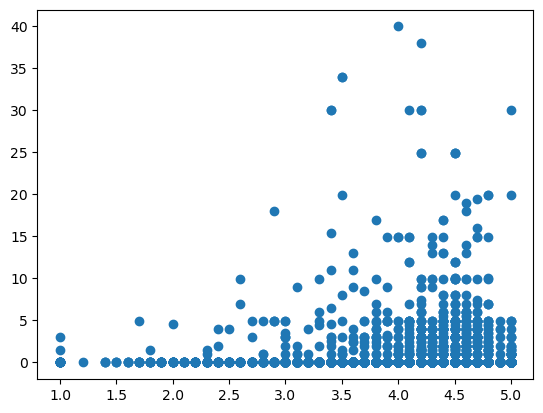

In [11]:
# New plot of the data
plt.scatter(n_df['Rating'], n_df['Price'])

Our data looks now a bit better (less deviation)

In [12]:
# Cleaning data
paid_df = n_df[n_df['Type']=='Paid'].dropna(subset=['Rating','Installs','Reviews'])
not_paid_df = n_df[n_df['Type']=='Free'].dropna(subset=['Rating'])

# Comparing length of paid and free apps
len(paid_df[paid_df['Price']!=0]), len(not_paid_df[not_paid_df['Price']==0].dropna(subset='Rating'))

(630, 8719)

Text(0.5, 1.0, 'Rating vs Price (Free and Paid Apps)')

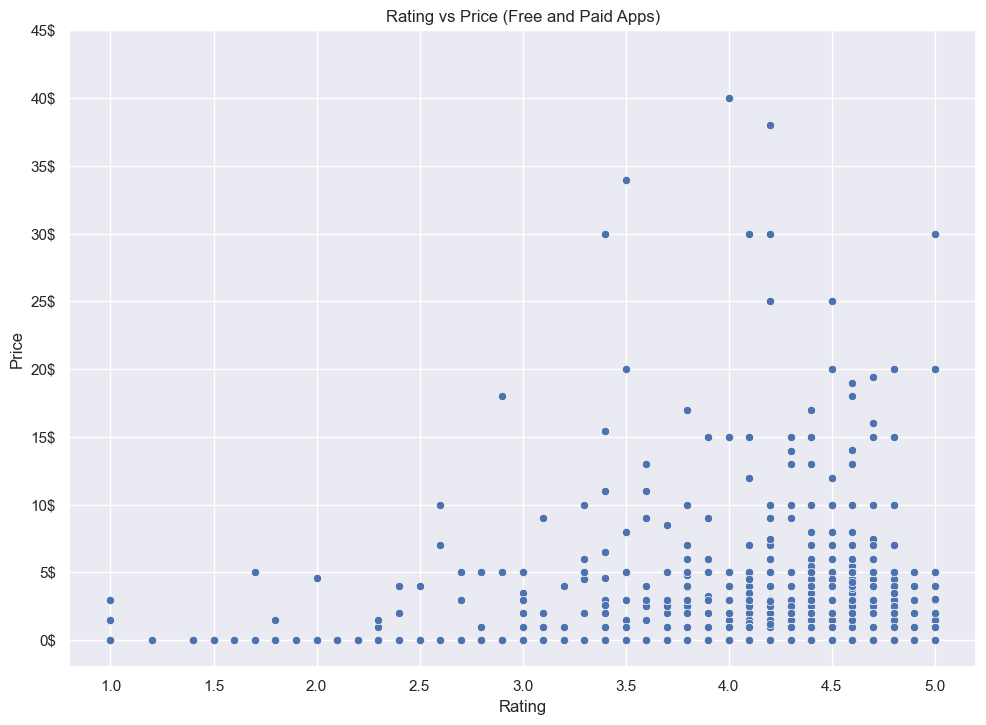

In [13]:
# Plotting a new data
sns.set(rc={'figure.figsize':(11.7,8.27)})
gfg=sns.scatterplot(x="Rating", y="Price",
             data=n_df)
plt.yticks([0,5,10,15,20,25,30,35,40,45], ['0$','5$','10$','15$','20$','25$','30$','35$','40$','45$']);
plt.title('Rating vs Price (Free and Paid Apps)')

In [14]:
paid_df

,Price,Installs,Rating,Reviews,Type
234,4.99,100000.0,4.7,11442.0,Paid
235,4.99,100000.0,4.8,10295.0,Paid
290,4.99,100000.0,4.7,11442.0,Paid
291,4.99,100000.0,4.8,10295.0,Paid
427,3.99,100000.0,4.0,18247.0,Paid
...,...,...,...,...,...
10690,0.99,100.0,5.0,5.0,Paid
10697,0.99,1.0,5.0,2.0,Paid
10760,7.99,1000.0,4.4,35.0,Paid
10782,16.99,10000.0,3.8,252.0,Paid


Text(0.5, 1.0, 'Reviews vs Price')

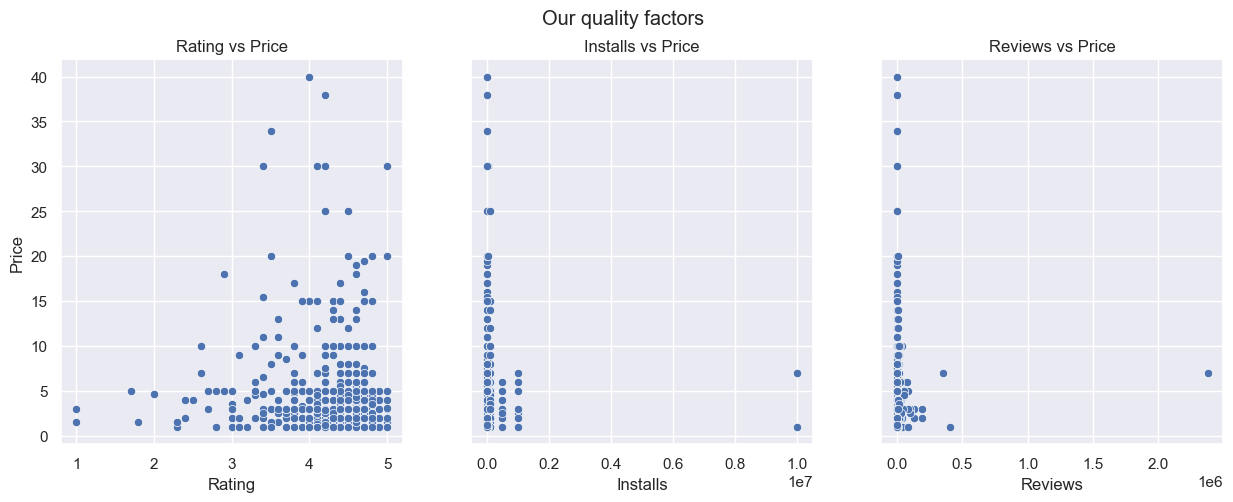

In [15]:
#Plotting our data
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
fig.suptitle('Our quality factors')

# Rating vs Price
sns.scatterplot(ax=axes[0],data=paid_df, x='Rating', y='Price')
axes[0].set_title('Rating vs Price')

# Installs vs Price
sns.scatterplot(ax=axes[1],data=paid_df, x='Installs', y='Price')
axes[1].set_title('Installs vs Price')

# Reviews vs Price
sns.scatterplot(ax=axes[2],data=paid_df, x='Reviews', y='Price')
axes[2].set_title('Reviews vs Price')

We can notice that Installs vs Price and Reviews vs Price have very large STD, which can impact on our model

In [16]:
ml_set = paid_df.loc[:,['Price','Rating','Installs','Reviews']]

Q1 = ml_set['Installs'].quantile(0.10)
Q2 = ml_set['Installs'].quantile(0.90)
Q3 = ml_set['Reviews'].quantile(0.10)
Q4 = ml_set['Reviews'].quantile(0.90)
Q5 = ml_set['Rating'].quantile(0.10)
Q6 = ml_set['Rating'].quantile(0.90)

IQR = Q2 - Q1
IQR1 = Q4 - Q3
IQR2 = Q6 - Q5

outlier = (ml_set['Installs'] < Q1 - 1.5*IQR) | (ml_set['Installs'] > Q2 + 1.5*IQR)|(ml_set['Reviews'] < Q3 - 1.5*IQR1) | (ml_set['Reviews'] > Q4 + 1.5*IQR1)|(ml_set['Rating'] < Q5 - 1.5*IQR2) | (ml_set['Rating'] > Q6 + 1.5*IQR2)
nl = ml_set[outlier]
nl

,Price,Rating,Installs,Reviews
853,3.99,4.7,500000.0,31085.0
2151,3.99,4.7,500000.0,31100.0
2241,6.99,4.5,10000000.0,2376564.0
2242,2.99,4.3,1000000.0,129603.0
2883,5.99,4.4,1000000.0,49553.0
2912,5.99,4.4,1000000.0,49553.0
2950,5.99,4.4,1000000.0,49553.0
3403,2.49,4.2,1000000.0,97890.0
3405,0.99,4.3,1000000.0,58617.0
4034,0.99,4.6,10000000.0,408292.0


## OUTLIERS

<br>Apps with very high number of installs, such as apps with 10 million installs or more.
<br>Apps with very low number of installs, such as apps with only 10 installs.
<br>Apps with very low number of reviews, such as apps with only 1 or 2 reviews.
<br>Apps with very low or very high ratings, such as apps with a rating of 1 or 5.

In [17]:
nl = ml_set[(ml_set['Installs']<1000000)&(ml_set['Reviews']<1000000) & (ml_set['Price']<15)]
nl['Installs']=np.log(nl.loc[:,'Installs'])

/var/folders/1s/8fc5px094r56t3mgz8mzt_tm0000gp/T/ipykernel_2790/3988902803.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nl['Installs']=np.log(nl.loc[:,'Installs'])


Text(0.5, 1.0, 'Reviews vs Price')

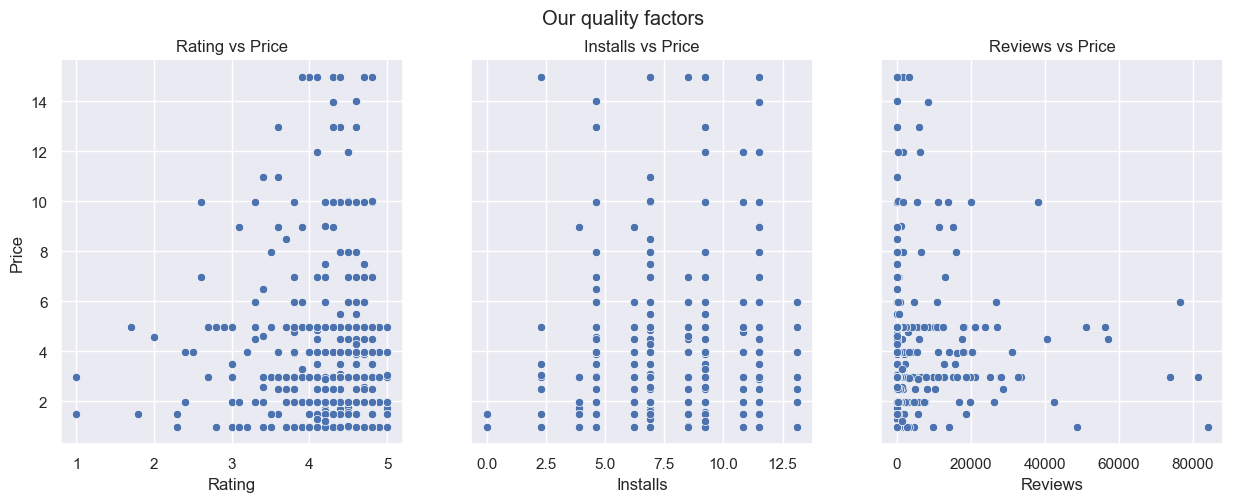

In [18]:
# Plotting a new clean data
fig, axess = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
fig.suptitle('Our quality factors')

# Rating vs Price
sns.scatterplot(ax=axess[0],data=nl, x='Rating', y='Price')
axess[0].set_title('Rating vs Price')

# Installs vs Price
sns.scatterplot(ax=axess[1],data=nl, x='Installs', y='Price')
axess[1].set_title('Installs vs Price')

# Reviews vs Price
sns.scatterplot(ax=axess[2],data=nl, x='Reviews', y='Price')
axess[2].set_title('Reviews vs Price')


Text(0.5, 0.92, 'Rating vs Installs vs Reviews (Cleaned)')

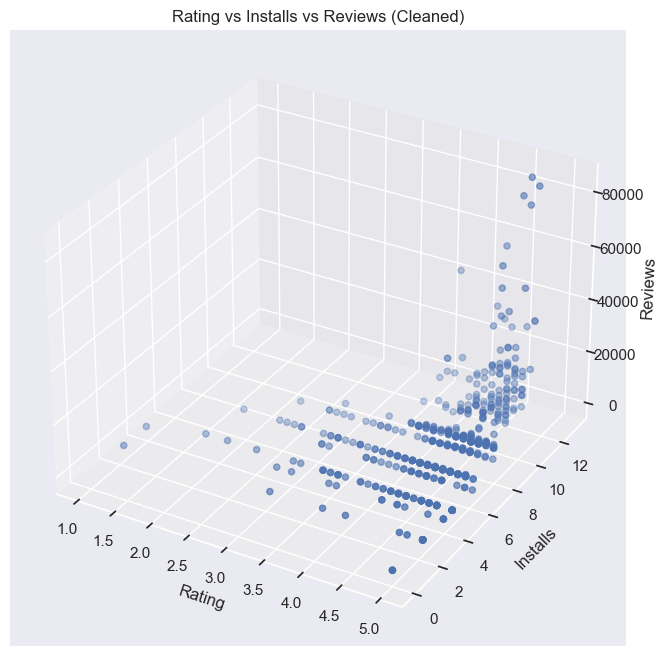

In [19]:
# Plotting our 3D data visualization of factors
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection="3d")

ax.scatter3D(nl['Rating'], nl['Installs'], nl['Reviews'], 'gray')

ax.set_xlabel("Rating")
ax.set_ylabel("Installs")
ax.set_zlabel("Reviews")
ax.set_title('Rating vs Installs vs Reviews (Cleaned)')

In [20]:
# Description of the new dataset
nl.describe()

,Price,Rating,Installs,Reviews
count,574.000000,574.000000,574.000000,574.000000
mean,3.795976,4.271777,8.129774,3661.745645
std,2.946393,0.558924,2.561752,9896.208040
min,0.990000,1.000000,0.000000,1.000000
25%,1.990000,4.100000,6.907755,30.000000
50%,2.990000,4.400000,8.517193,202.500000
75%,4.990000,4.600000,9.210340,1665.500000
max,14.990000,5.000000,13.122363,84114.000000


# Machine Learning
After cleaning and understanding our data a bit better, we are able to take care of the model. We know that ML model is not an easy thing, requires clean dataset, and what's the most important, a lot of data. However, we are working only on Paid application, which don't have option to support with additional ones. Firstly, we are going to present a linear model to take a brief view of the model and then, we are going to find the best possible model from our data.

In [21]:
# Importing ML scikit
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

X = nl[['Rating','Installs','Reviews']]
y = nl['Price']


In [22]:
# creating train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Creating a Linear Regression model
model = LinearRegression()

# Fitting the data
model.fit(X_train,y_train)

LinearRegression()

In [23]:
# Predicting results
predictions = model.predict(X_test)

### RMSE AND R^2
Worth thing to mention before are Root Mean Square Error (RMSE) which measure the difference between the actual values and the predicted values of the model, and R^2 which represent proportion of the variance in the dependent variable.

In [24]:
# Calculate RMSE and R^2
from sklearn.metrics import mean_squared_error, r2_score

rmse = mean_squared_error(y_test, predictions, squared=False)
r2 = r2_score(y_test, predictions)
print('RMSE:', rmse)
print('R^2:', r2)

RMSE: 3.1379822112882145
R^2: 0.014213219894103846


In [25]:
# Finding model coeff
model.coef_, model.intercept_

(array([-2.36866314e-01,  1.06093920e-01, -1.05893100e-06]), 3.935215053982443)

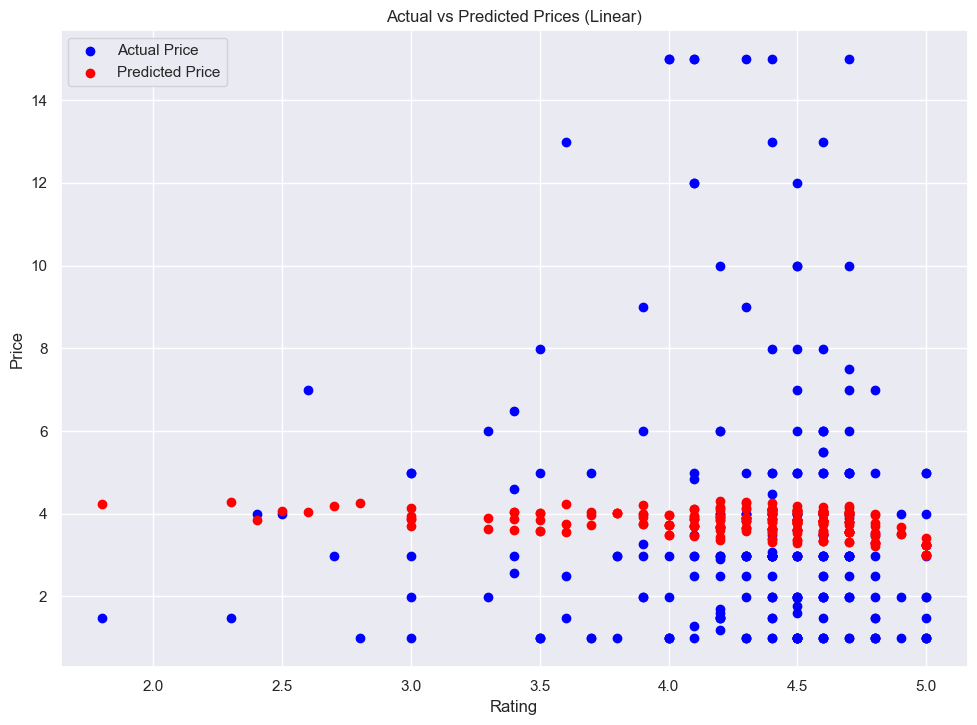

In [26]:
# Plotting results
plt.scatter(X_test['Rating'], y_test, color='blue', label='Actual Price')
plt.scatter(X_test['Rating'], predictions, color='red', label='Predicted Price')

plt.xlabel('Rating')
plt.ylabel('Price')
plt.title('Actual vs Predicted Prices (Linear)')

plt.legend()
plt.show()

# Polynomial Regression
Second type of model, which from my research occured to be more accurate

In [27]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2, include_bias=False)

In [28]:
# Fitting and transforming data
poly_features = poly.fit_transform(X)

In [29]:
# Preparing data
X__train, X__test, y__train, y__test = train_test_split(poly_features, y, test_size=0.4, random_state=42)

# Creating a model
poly_reg_model = LinearRegression()

# Fitting a data to model
poly_reg_model.fit(X__train, y__train)

# Predicting results
poly_reg_y_predicted = poly_reg_model.predict(X__test)

# Calculating RMSE and R^2
poly_reg_rmse = np.sqrt(mean_squared_error(y__test, poly_reg_y_predicted))
r2 = r2_score(y__test, poly_reg_y_predicted)
print('RMSE:', rmse)
print('R^2:', r2)

RMSE: 3.1379822112882145
R^2: 0.014209521476321152


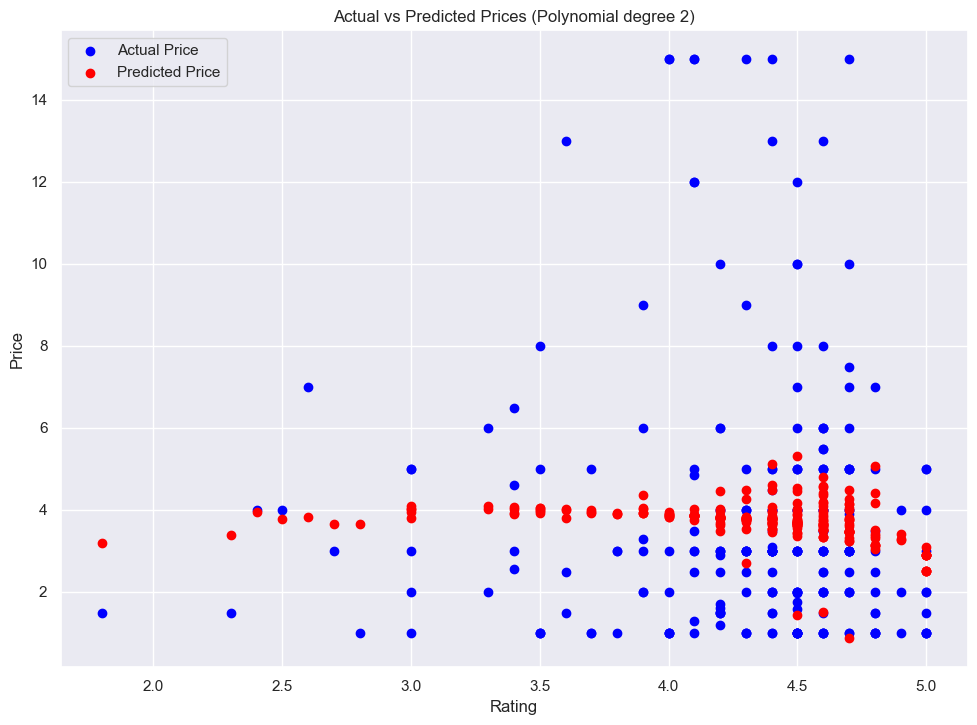

In [30]:
# Plotting results
plt.scatter(X__test[:,0], y__test, color='blue', label='Actual Price')
plt.scatter(X__test[:,0], poly_reg_y_predicted, color='red', label='Predicted Price')

plt.xlabel('Rating')
plt.ylabel('Price')
plt.title('Actual vs Predicted Prices (Polynomial degree 2)')

plt.legend()
plt.show()

# Conclusion

We may deduce that the collection contains information on approximately 630 Google Play Store mobile applications, including their prices, ratings, installs, and reviews. We can see that the majority of the apps in the dataset are free with in-app purchases, while the purchased apps have a wide range of costs, with a maximum price of $399.99 (after cleaning 14.99). The apps in the dataset have an average rating of 4.27 out of 5, and an average of 8.1 million installs. We attempted to construct a linear regression model to investigate the relationship between app price and app quality, however the model did not fit the data well, indicating that there may not be a substantial correlation between these two variables. However, due to the small size of the dataset, drawing definitive conclusions is challenging.
<br>Furthermore, we can deduce that developers prefer free apps with in-app purchases, and these apps may be more profitable than paid apps. However, we do not have enough data to establish the percentage of users that buy in-app products.
<br>Overall, while this dataset provides some insight into the mobile app industry, more study with a larger dataset and more variables is required to draw more definitive conclusions regarding the links between various aspects influencing the performance of mobile applications.